# Schedule distribution analysis
---

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Upload CSV files

In [10]:
ruta = '../data/test/students' 

files = [f for f in os.listdir(ruta) if f.endswith('.csv')]
schedules = {}

for file in files:
    df = pd.read_csv(os.path.join(ruta, file), header=None)
    schedules[file] = df

print(f'{len(schedules)} files were uploaded successfully ✅')

3 files were uploaded successfully ✅


## General Analysis
Counting of empty blocks, classes, and activities per file.

In [11]:
resumen = []

for name, df in schedules.items():
    count = df.stack().value_counts().to_dict()
    resumen.append({
        'File': name,
        'Slots empty (0)': count.get(0, 0),
        'Classes (1)': count.get(1, 0),
        'Subject classes (2)': count.get(2, 0),
        'Total': df.size
    })

resumen_df = pd.DataFrame(resumen)
display(resumen_df)

,File,Slots empty (0),Classes (1),Subject classes (2),Total
0,1.csv,19,0,1,20
1,3.csv,14,5,1,20
2,2.csv,14,5,1,20


## Schedule Display
Each file is displayed as a **heatmap** where:
- 0 → Light gray (empty)
- 1 → Blue (activity)
- 2 → Green (activity related to the subject)

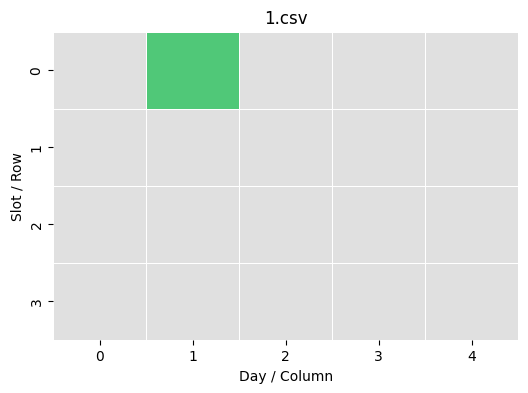

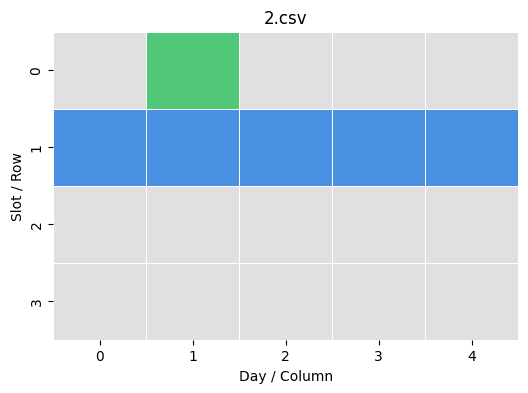

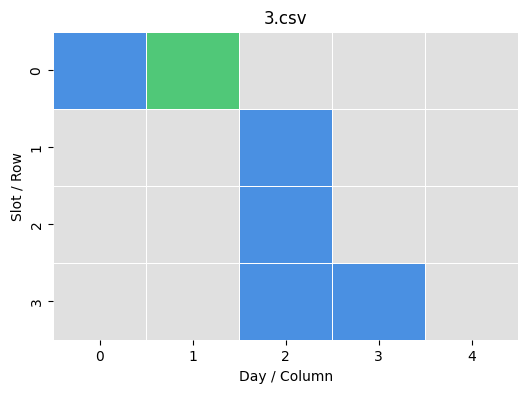

In [12]:
def show_schedule(df, titulo=''):
    plt.figure(figsize=(6, 4))
    cmap = sns.color_palette(['#e0e0e0', '#4A90E2', '#50C878']) 
    sns.heatmap(df, cmap=cmap, cbar=False, linewidths=0.5, linecolor='white')
    plt.title(titulo)
    plt.xlabel('Day / Column')
    plt.ylabel('Slot / Row')
    plt.show()

for name in sorted(schedules.keys(), key=lambda x: int(os.path.splitext(x)[0])):
    show_schedule(schedules[name], titulo=name)

---
### Accumulated heat map

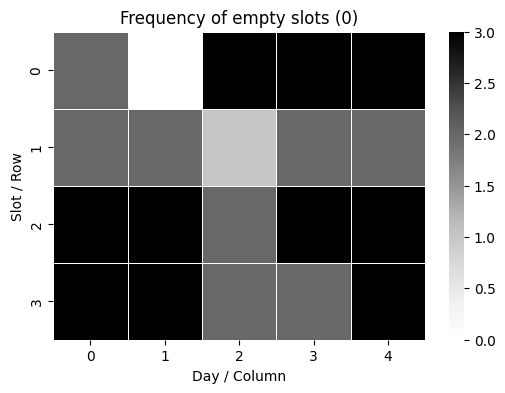

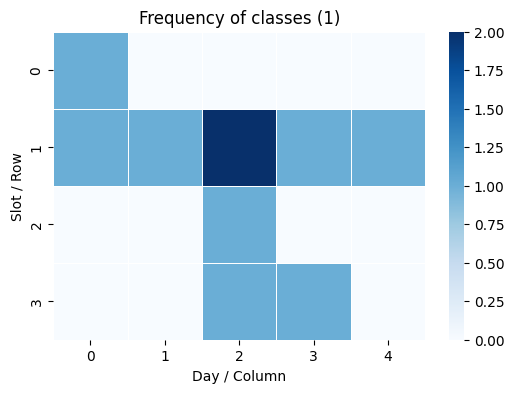

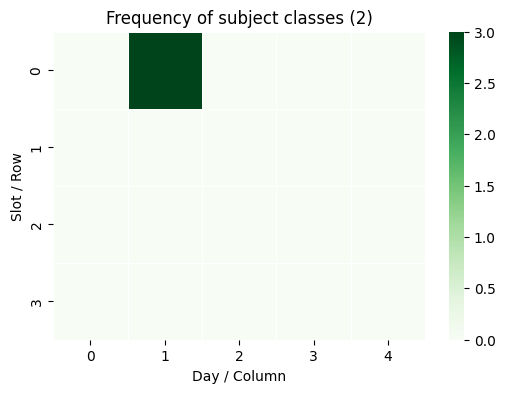

Slots with more emptys (0) → 3 times:
  • Row 0, Column 2
  • Row 0, Column 3
  • Row 0, Column 4
  • Row 2, Column 0
  • Row 2, Column 1
  • Row 2, Column 3
  • Row 2, Column 4
  • Row 3, Column 0
  • Row 3, Column 1
  • Row 3, Column 4

Slots with more classes (1) → 2 times:
  • Row 1, Column 2

Slots with more subject classes (2) → 3 times:
  • Row 0, Column 1


In [13]:
shape = list(schedules.values())[0].shape
count_0 = pd.DataFrame(np.zeros(shape, dtype=int))
count_1 = pd.DataFrame(np.zeros(shape, dtype=int))
count_2 = pd.DataFrame(np.zeros(shape, dtype=int))

for df in schedules.values():
    count_0 += (df == 0).astype(int)
    count_1 += (df == 1).astype(int)
    count_2 += (df == 2).astype(int)

def show_accumulated_heatmap(matrix, title, color):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap=color, cbar=True, linewidths=0.5, linecolor='white')
    plt.title(title)
    plt.xlabel("Day / Column")
    plt.ylabel("Slot / Row")
    plt.show()

show_accumulated_heatmap(count_0, "Frequency of empty slots (0)", "Greys")
show_accumulated_heatmap(count_1, "Frequency of classes (1)", "Blues")
show_accumulated_heatmap(count_2, "Frequency of subject classes (2)", "Greens")

def get_maximum(df):
    max_val = df.values.max()
    positions = np.argwhere(df.values == max_val)
    return max_val, positions

max_val_0, pos_0 = get_maximum(count_0)
max_val_1, pos_1 = get_maximum(count_1)
max_val_2, pos_2 = get_maximum(count_2)

print(f"Slots with more emptys (0) → {max_val_0} times:")
for row, col in pos_0:
    print(f"  • Row {row}, Column {col}")

print(f"\nSlots with more classes (1) → {max_val_1} times:")
for row, col in pos_1:
    print(f"  • Row {row}, Column {col}")

print(f"\nSlots with more subject classes (2) → {max_val_2} times:")
for row, col in pos_2:
    print(f"  • Row {row}, Column {col}")
